# Accessing PubChem through PUG-REST - Part I

```{dropdown} About this interactive ![icons](../images/rocket.png) recipe
- Author(s): [Sunghwan Kim](https://orcid.org/0000-0001-9828-2074)
- Reviewer: [Samuel Munday](https://orcid.org/0000-0001-5404-6934)
- Topic(s): How to programmatically get molecular properties, structures, and images from PubChem.
- Format(s): Interactive Jupyter Notebook (Python)
- Scenario(s):
- Skill(s):
- Learning outcomes:
- Citation: We will not be providing citations for the sampler, but citations for recipes will be available (with copy button) in the full release of the Cookbook and will include DOI’s.
- Reuse: This notebook is made available under a [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/) license.
```

## 1. Basic Syntax of PUG-REST Request URL

PubChem (https://pubchem.ncbi.nlm.nih.gov) is a popular chemical information resource.  A brief introduction and some tutorials are available in the [Repository: PubChem](repositories/pubchem) section of this book.  Please read the materials available on that section to get familiar with the data contained in PubChem.  
<br>
PubChem provides multiple programmatic access routes: Power User Gateway (PUG), PUG-SOAP, PUG-REST, and PUG-View, Entrez Utilities, and PubChemRDF REST interface.  More detailed information on these access routes can be found in the [PubChem Programmatic Access help page](https://pubchem.ncbi.nlm.nih.gov/docs/programmatic-access).

This Jupyter notebook demonstrates how to access chemical information contained in PubChem through PUG-REST,  which is a [REpresentational State Transfer (REST)](https://en.wikipedia.org/wiki/Representational_state_transfer)-like interface to PubChem data.

A detailed description of the PUG-REST Request URL syntax can be found in the PUG-REST help page (https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest).

A PUG-REST request url consists of the following parts:
- prolog : a common string (``https://pubchem.ncbi.nlm.nih.gov/rest/pug``) with which all PUG-REST requests begin.  
- input: specifies input chemicals, assays, genes, proteins, etc. (record identifiers, chemical names, structures, etc.)
- operation: specifies what to do with the input
- output : specifies the output format (e.g., TXT, CSV, PNG, XML, JSON, SDF)
- option : optional parameters specific to some operations.  These parameters are specified as URL parameters after the "?" character.

![PUG-REST URL syntax](../images/pubchem-pug-rest-syntax.jpg)

The following example shows how to formulate a four-component PUG-REST Request URL to get the molecular formula of PubChem Compound ID (CID) 2244 in TXT.  CID 2244 corresponds to asprin and you can access its [Compound Summary page](https://pubchem.ncbi.nlm.nih.gov/compound/2244).  You can also get to this page from the [PubChem homepage](https://pubchem.ncbi.nlm.nih.gov) by searching for "aspirin" or "CID2244".  For more information, see the "[Repository: PubChem](repositories/pubchem)" page. 

### 1. Import the Python packages needed to run this code

In [1]:
import requests
import time
from IPython.display import Image, display

### 2. Construct a PUG-REST API and retrieve data

In [2]:
pugrest_prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugrest_input = "compound/cid/2244"
pugrest_operation = "property/MolecularFormula"
pugrest_output = "txt"

pugrest_url = "/".join( (pugrest_prolog, pugrest_input, pugrest_operation, pugrest_output) )
print("REQEST URL:", pugrest_url)

res = requests.get(pugrest_url)
print("OUTPUT    :", res.text.strip())   # .strip() removes the newline character "\n" at the end of returned string.

REQEST URL: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/MolecularFormula/txt
OUTPUT    : C9H8O4


The above request can be simplified like the following examples

In [3]:
print(requests.get(pugrest_url).text.strip())

C9H8O4


**Usage Policies**

All PubChem web pages (or requests to NCBI in general) have a policy that users should throttle their web page requests, which includes web-based programmatic services.  Users should limit their web-requests to no more than five per second.  Violators of usage policies may result in the user being temporarily blocked from accessing PubChem (or NCBI) resources.

In practice, users should use the ```time.sleep()``` command in their scripts to limit the speed of the requests sent to PubChem

In [4]:
time.sleep(1.0)    # sleep for 1 second.

To learn more about the usage policies and related topics, please see these two documents.

- [Request Volume Limitations](https://pubchem.ncbi.nlm.nih.gov/docs/programmatic-access#section=Request-Volume-Limitations)
- [Dynamic Request Throttling](https://pubchem.ncbi.nlm.nih.gov/docs/dynamic-request-throttling)


### 3. Getting Computed Molecular Properties

Various kinds of **computed** molecular properties, such as molecular weight, hydrogen-bond donor and acceptor counts, heavy atom count, XLogP, and Topological polar surface area (TPSA) are available through PUG-REST as shown below.  A complete list of the computed molecular properties available through PUG-REST can be found at the PUG-REST help page (https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest).

In [5]:
# Molecular weight
print("MolecularWeight  :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/MolecularWeight/txt").text.strip())

# Hydrogen-bond donor count
print("HBondDonorCount  :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/HBondDonorCount/txt").text.strip())

# Hydrogen-bond acceptor count
print("HBondAcceptorCoun:", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/HBondAcceptorCount/txt").text.strip())

# Heavy (non-hydrogen) atom count
print("HeavyAtomCount   :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/HeavyAtomCount/txt").text.strip())

# XLogP
print("XLogP            :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/XLogP/txt").text.strip())

# Topological polar surface area (TPSA)
print("TPSA             :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/TPSA/txt").text.strip())

MolecularWeight  : 180.16
HBondDonorCount  : 1
HBondAcceptorCoun: 4
HeavyAtomCount   : 13
XLogP            : 1.200
TPSA             : 63.6


It is also possible to get **multiple kinds of properties** for a given chemical with a **single request**, by providing a list of desired properties in the request URL (separated with commas). Note that the output format specified in the request URL is **"CSV"** (which means "comma-separated values").  If "txt" is used here, you will get an error message saying "TXT output is limited to a single property".

In [6]:
print(requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244/property/MolecularWeight,HBondDonorCount,HBondAcceptorCount,HeavyAtomCount,XLogP,TPSA/csv").text.strip())

"CID","MolecularWeight","HBondDonorCount","HBondAcceptorCount","HeavyAtomCount","XLogP","TPSA"
2244,180.16,1,4,13,1.200,63.6


You can get molecular properties of **multiple chemicals** with a **single request** by providing their CIDs as input identifiers.

In [7]:
print(requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/2244,1983,3672,156391/property/MolecularWeight,HBondDonorCount,HBondAcceptorCount,HeavyAtomCount,XLogP,TPSA/csv").text.strip())

"CID","MolecularWeight","HBondDonorCount","HBondAcceptorCount","HeavyAtomCount","XLogP","TPSA"
2244,180.16,1,4,13,1.200,63.6
1983,151.16,2,2,11,0.500,49.3
3672,206.28,1,2,15,3.500,37.3
156391,230.26,1,3,17,3.300,46.5


The returned CSV output can be opened in a spreadsheet program (e.g., Microsoft Excel or GoogleSheet).

### 4. Getting Chemical Structures

Through PUG-REST, you can get the structure of a molecule in several formats:
- line notations (SMILES, InChI, and InChIKey)
- 2-D and 3-D images (in PNG)
- 3-D conformers (with the 3-D coordinates).

In PUG-REST, the chemical structure line notations (SMILES, InChI, and InChIKeys) are treated like molecular properties.

In [8]:
# Canonical SMILES
print("Canonical SMILES:", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/446157/property/CanonicalSMILES/TXT").text.strip())

# Isomeric SMILES
print("Isomeric SMILES :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/446157/property/IsomericSMILES/TXT").text.strip())

# InChI
print("InChI           :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/446157/property/InChI/TXT").text.strip())

# InChIKey
print("InChIKey        :", requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/446157/property/InChIKey/TXT").text.strip())

Canonical SMILES: CC(C)C1=NC(=NC(=C1C=CC(CC(CC(=O)O)O)O)C2=CC=C(C=C2)F)N(C)S(=O)(=O)C
Isomeric SMILES : CC(C)C1=NC(=NC(=C1/C=C/[C@H](C[C@H](CC(=O)O)O)O)C2=CC=C(C=C2)F)N(C)S(=O)(=O)C
InChI           : InChI=1S/C22H28FN3O6S/c1-13(2)20-18(10-9-16(27)11-17(28)12-19(29)30)21(14-5-7-15(23)8-6-14)25-22(24-20)26(3)33(4,31)32/h5-10,13,16-17,27-28H,11-12H2,1-4H3,(H,29,30)/b10-9+/t16-,17-/m1/s1
InChIKey        : BPRHUIZQVSMCRT-VEUZHWNKSA-N


It is also possible to get these line notations for **multiple chemicals** with a **single request**.

In [9]:
print(requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/446157,53114542,5280656/property/InChIKey,IsomericSMILES/CSV").text.strip())

"CID","InChIKey","IsomericSMILES"
446157,"BPRHUIZQVSMCRT-VEUZHWNKSA-N","CC(C)C1=NC(=NC(=C1/C=C/[C@H](C[C@H](CC(=O)O)O)O)C2=CC=C(C=C2)F)N(C)S(=O)(=O)C"
53114542,"GDHZQMFXVQIWAW-UHFFFAOYSA-N","CC1=C(C=C(C=C1)Cl)NC(=O)CN2C=CC=C2C3=NN=C(O3)C4CC4"
5280656,"KHPCPRHQVVSZAH-GUNCLKARSA-N","C1=CC=C(C=C1)/C=C/CO[C@H]2[C@@H]([C@H]([C@@H]([C@H](O2)CO)O)O)O"


It is worth noting that these line notations are developed for machine readability of chemical structures.  Therefore, it is not easy for humans to recognize the structure of a molecule from its line notations, especially for a large molecule.  The most straightforward way for humans to understand the molecular structure is through its drawing or image.  Through PUG-REST, you can get the 2-D and 3-D images of the molecule.

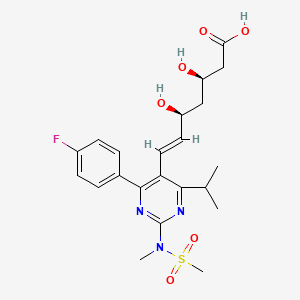

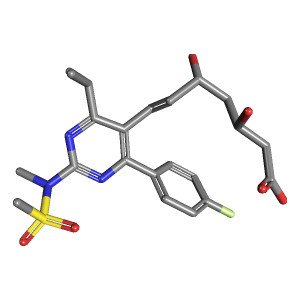

In [10]:
res2d = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/446157/record/PNG?image_size=large")
res3d = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/446157/record/PNG?image_size=large&record_type=3d")
display(Image(res2d.content), Image(res3d.content))

Note that the above request URLs contain optional parameters `record_type` and `image_size`after the "?" character.
- `record_type` : specifies whether 2-D or 3-D information is requested.  The default is "2d".
- `image_size` : specifies the size of the image.  It can be "large" (300x300) or "small" (100x100). For 2-D structure images, an arbitrary size (e.g., 320x240) is also supported.  Arbitrarily-sized 3D image generation is **not** currently implemented in PUG-REST.  


For more information, see the [PubChem Imaging Services page](https://pubchem.ncbi.nlm.nih.gov/docs/imaging-services) as well as the [PUG-REST help page](https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest). 

It is noteworthy that the 3-D structure returned from the above request is computationally generated, not experimentally determined.  For each compound, an ensemble of up to 500 conformers are generated by sampling from its conformational space (as described in [Kim et al. J. Cheminform. 5:1 (2013)](https://doi.org/10.1186/1758-2946-5-1)) and up to ten **"diverse"** conformers are used for PubChem's public services. A diverse conformer ordering gives a maximal description of the conformational space of a molecule when only a subset of available conformers is used. To read more about the diverse conformer ordering, please see [Bolton et al., J. Cheminform, 3:32 (2011)](https://doi.org/10.1186/1758-2946-3-32).

The 3-D cooordinates of the first diverse conformer (which corresponds to the 3-D image retrieved above) can be accessed using the following request URL.

In [11]:
res = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/446157/record/SDF?record_type=3d")
with open("conformer1.txt", 'w') as file:
    file.write(res.text)

The output format "**SDF**" stands for "structure-data file".  Also note that the optional parameter `record_type=3d` is provided after the "?" character.  The 3-D structures contained in SDF files can be visualized using many molecular visualization programs.

The `with open()... as file` statement in the above cell stores the retrieved 3-D coordinates in a file called "conformer1.txt".

Other diverse conformers of a molecule can be accessed through PUG-REST.  This is a two-step task:
1. Get the identifiers for the diverse conformers in the conformer ensemble.
2. Access the data for a particular conformer by using its conformer identifier retrieved from the first step.

The following example shows how to get the diverse conformer identifiers (step 1)

In [12]:
print(requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/446157/conformers/TXT").text.strip())

0006CECD00000001
0006CECD00000007
0006CECD0000002E
0006CECD0000001A
0006CECD00000015
0006CECD00000013
0006CECD00000027
0006CECD0000000D
0006CECD00000016
0006CECD00000017


The following example shows how to get the 3-D coordinates of the second diverse conformer (the second one from the above conformer list).

In [13]:
res = requests.get("https://pubchem.ncbi.nlm.nih.gov/rest/pug/conformers/0006CECD00000007/SDF")
with open("conformer2.txt", 'w') as f:
    f.write(res.text)

The code in the above cell downloads the 3-D coordinates of the conformer "0006CECD00000007" in the SDF format and saves it as "conformer2.txt".